In [1]:
import time
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram

from Agnes import Agnes
from utils import report
from DBscan import DBscan 

import warnings
warnings.filterwarnings("ignore") 
cmap = 'Spectral'

In [2]:
data = pd.read_csv('datset.csv') 
cat = ['OverTime', 'MaritalStatus', 'JobRole', 'Gender', 'EducationField', 'Department', 'BusinessTravel', 'Attrition']
data = data.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1)
for i in cat:
    data[i] = (data[i].astype('category').cat.codes).apply(np.int64)
X, y = data.drop(['Attrition'], axis=1), data['Attrition']

In [3]:
X, y = np.array(X), list(y)

data_x = data.drop(['Attrition'], axis=1)
X_standardized = np.array((data_x - data_x.mean()) / data_x.std())
X_normalized = np.array(((data_x - data_x.min()) / (data_x.max() - data_x.min())))

# Single

In [4]:
'''agnes = Agnes('hamming', 'single') 
dist_matrix = np.load('Agnes//Distances_Hamming.npy') 

start = time.time()
cluster_id_H, clusters_H, distances_H, nb_clusters_H = agnes.cluster(X, dist_matrix=dist_matrix) 
end = time.time() - start
print('Hamming done', end)'''

agnes = Agnes('manhattan', 'single') 
dist_matrix = np.load('Agnes//Distances_Manhattan.npy') 
     
start = time.time() 
cluster_id_M, clusters_M, distances_M, nb_clusters_M = agnes.cluster(X, dist_matrix=dist_matrix) 
end = time.time() - start
print('Manhattan done', end)

agnes = Agnes('manhattan', 'single') 
dist_matrix = np.load('Agnes//Distances_Manhattan_Norm.npy') 
     
start = time.time()
cluster_id_N, clusters_N, distances_N, nb_clusters_N = agnes.cluster(X_normalized, dist_matrix=dist_matrix) 
end = time.time() - start
print('Manhattan Norm done', end)

agnes = Agnes('manhattan', 'single') 
dist_matrix = np.load('Agnes//Distances_Manhattan_Std.npy') 
     
start = time.time()
cluster_id_S, clusters_S, distances_S, nb_clusters_S = agnes.cluster(X_standardized, dist_matrix=dist_matrix) 
end = time.time() - start
print('Manhattan Std done', end)

Manhattan done 754.012547492981
Manhattan Norm done 562.1271848678589
Manhattan Std done 493.80848240852356


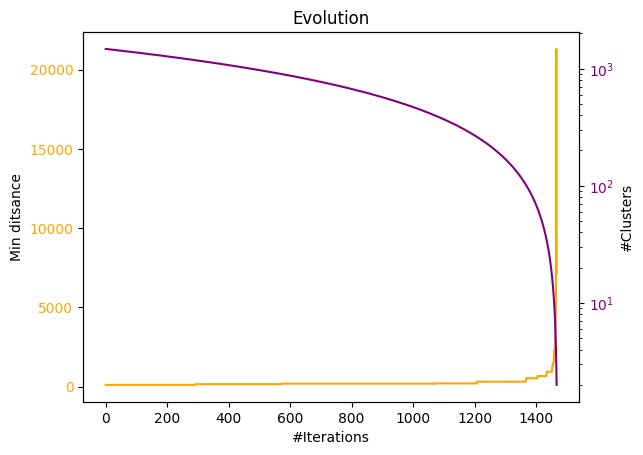

In [5]:
fig, ax = plt.subplots()
ax.plot(distances_M, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_M, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

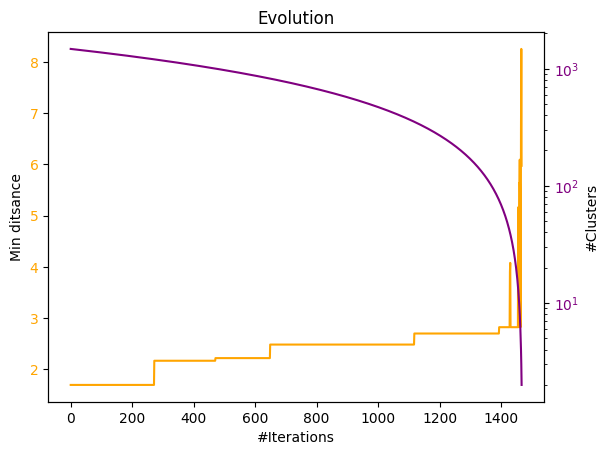

In [6]:
fig, ax = plt.subplots()
ax.plot(distances_N, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_N, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

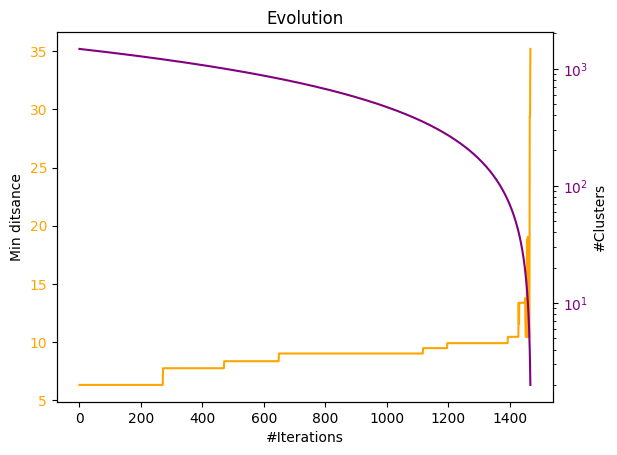

In [7]:
fig, ax = plt.subplots()
ax.plot(distances_S, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_S, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

In [8]:
report(y, [1 if i in cluster_id_M[1] else 0 for i in range(len(X))])

Classification Report
Class 0
Precision: 0.839
Recall: 0.998
F1-Score: 0.912

Class 1
Precision: 0.000
Recall: 0.000
F1-Score: 0.000

Accuracy: 0.720


In [9]:
report(y, [1 if i in cluster_id_N[1] else 0 for i in range(len(X))])

Classification Report
Class 0
Precision: 0.838
Recall: 0.993
F1-Score: 0.909

Class 1
Precision: 0.000
Recall: 0.000
F1-Score: 0.000

Accuracy: 0.713


In [10]:
report(y, [1 if i in cluster_id_S[1] else 0 for i in range(len(X))])

Classification Report
Class 0
Precision: 0.839
Recall: 0.999
F1-Score: 0.912

Class 1
Precision: 0.500
Recall: 0.004
F1-Score: 0.008

Accuracy: 0.722
